In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_data = pd.read_csv("data/flat_data.csv")
question_key = pd.read_csv("data/question_key.csv")

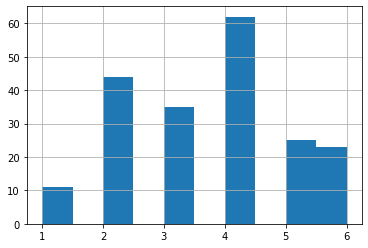

In [2]:
new_data["Mortality_cat"] = pd.cut(new_data["Mortality_Rate"],
                                  bins=[12.5, 18.65, 24.8, 30.95, 37.1, 43.25, np.inf],
                                  labels=[1, 2, 3, 4, 5, 6])
new_data["Mortality_cat"].hist()
plt.show()

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 49)
for train_index, test_index in split.split(new_data, new_data["Mortality_cat"]):
    train_set = new_data.loc[train_index]
    test_set = new_data.loc[test_index]

In [4]:
distrub = pd.DataFrame()
distrub["test_set"] = test_set["Mortality_cat"].value_counts() / len(test_set)
distrub["orginal_data"] = new_data["Mortality_cat"].value_counts() / len(new_data)
distrub

,test_set,orginal_data
4,0.300,0.310
2,0.225,0.220
3,0.175,0.175
5,0.125,0.125
6,0.125,0.115
1,0.050,0.055


In [5]:
for set_ in test_set, train_set:
    set_.drop("Mortality_cat", axis=1, inplace=True)

X_train = train_set.drop(["Mortality_Rate", "Deaths"], axis=1)
y_train = train_set["Mortality_Rate"].values

In [6]:
cols_drop = []

for col in X_train.columns:
    if train_set[col].isna().sum() > 80:
        cols_drop.append(col)
        
X_train = X_train.drop(cols_drop, axis=1)
X_train.head()

,Year,State,Q03%,Q08_Mean,Q09%,Q13%,Q16%,Q17%,Q18%,Q19%,...,Total!!Population 18 to 24 years!!High school graduate (includes equivalency),Total!!Population 18 to 24 years!!Less than high school graduate,Total!!Population 18 to 24 years!!Some college or associate's degree,"Total!!Population 25 years and over!!9th to 12th grade, no diploma",Total!!Population 25 years and over!!Associate's degree,Total!!Population 25 years and over!!Bachelor's degree,Total!!Population 25 years and over!!Graduate or professional degree,Total!!Population 25 years and over!!High school graduate (includes equivalency),Total!!Population 25 years and over!!Less than 9th grade,"Total!!Population 25 years and over!!Some college, no degree"
110,2017,Hawaii,8.6,4.2,62.5,22.6,25.1,9.1,51.9,66.4,...,50218,8019,55144,42636,106987,216993,111687,280494,34495,204452
52,2016,Arizona,10.8,5.7,63.8,29.9,29.8,13.5,45.2,NaN,...,222145,104586,294824,349224,390843,835779,500115,1105497,265215,1179736
195,2018,Virginia,9.5,4.9,62.5,33.1,27.7,13.7,49.2,70.5,...,265174,85714,363726,358586,453566,1296041,994416,1398061,229799,1091538
191,2018,Tennessee,14.0,6.9,62.8,35.3,39.5,20.7,39.6,67.5,...,215102,76729,264531,358348,348066,801616,473809,1477132,206601,975251
6,2015,Connecticut,9.6,4.5,62.3,27.7,26.2,11.9,54.3,NaN,...,97565,37981,165295,137496,187970,535933,412111,678916,104772,417520


In [7]:
X_train.isna().sum()

Year                                                                                   0
State                                                                                  0
Q03%                                                                                   0
Q08_Mean                                                                               0
Q09%                                                                                   0
Q13%                                                                                   0
Q16%                                                                                   0
Q17%                                                                                   0
Q18%                                                                                   0
Q19%                                                                                  79
Q21%                                                                                   0
Q27%                 

In [8]:
X_train = X_train.drop(["State","Year"], axis=1)
print(X_train.shape)
X_train.head()

(160, 45)


,Q03%,Q08_Mean,Q09%,Q13%,Q16%,Q17%,Q18%,Q19%,Q21%,Q27%,...,Total!!Population 18 to 24 years!!High school graduate (includes equivalency),Total!!Population 18 to 24 years!!Less than high school graduate,Total!!Population 18 to 24 years!!Some college or associate's degree,"Total!!Population 25 years and over!!9th to 12th grade, no diploma",Total!!Population 25 years and over!!Associate's degree,Total!!Population 25 years and over!!Bachelor's degree,Total!!Population 25 years and over!!Graduate or professional degree,Total!!Population 25 years and over!!High school graduate (includes equivalency),Total!!Population 25 years and over!!Less than 9th grade,"Total!!Population 25 years and over!!Some college, no degree"
110,8.6,4.2,62.5,22.6,25.1,9.1,51.9,66.4,11.7,11.5,...,50218,8019,55144,42636,106987,216993,111687,280494,34495,204452
52,10.8,5.7,63.8,29.9,29.8,13.5,45.2,NaN,8.8,17.7,...,222145,104586,294824,349224,390843,835779,500115,1105497,265215,1179736
195,9.5,4.9,62.5,33.1,27.7,13.7,49.2,70.5,8.1,15.4,...,265174,85714,363726,358586,453566,1296041,994416,1398061,229799,1091538
191,14.0,6.9,62.8,35.3,39.5,20.7,39.6,67.5,6.3,24.6,...,215102,76729,264531,358348,348066,801616,473809,1477132,206601,975251
6,9.6,4.5,62.3,27.7,26.2,11.9,54.3,NaN,9.2,17.4,...,97565,37981,165295,137496,187970,535933,412111,678916,104772,417520


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_tr = imputer.fit_transform(X_train)
X_train_tr.shape

(160, 45)

In [10]:
question_key

,QuestionID,Question
0,Q01,Percentage of older adults who are eating 2 or...
1,Q02,Percentage of older adults who are eating 3 or...
2,Q03,Percentage of older adults who are experiencin...
3,Q04,Percentage of older adults who have been told ...
4,Q05,Percentage of older adults who have fallen and...
5,Q07,Percentage of older adults who report having l...
6,Q08,Physically unhealthy days (mean number of days...
7,Q09,"Percentage of at risk adults (have diabetes, a..."
8,Q10,Percentage of older adult men who are up to da...
9,Q11,Percentage of older adult women who are up to ...


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

q10_ix, q11_ix, q12_ix, q15_ix, q18_ix, q20_ix = 15, 16, 17, 18, 6, 19
q07_ix, q13_ix, q17_ix, q21_ix, q35_ix = 14, 3, 5, 8, 12
high_school_or_less_ix = [25, 24, 27, 32 ,31]
college_degrees_ix = [26, 23, 28, 29, 30]


class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, poor_habits_adder=True):
        self.poor_habits_adder = poor_habits_adder
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        health_checks =  (X[:, q10_ix] + X[:, q11_ix] + X[:, q12_ix] + X[:, q15_ix] + X[:, q18_ix] + X[:, q20_ix]) / 6
        edu_lte_high_school = np.sum(X[:, high_school_or_less_ix], axis=1) / 5
        edu_college_degree = np.sum(X[:, college_degrees_ix], axis=1) / 5
        if self.poor_habits_adder:
            poor_habit_score = (X[:, q07_ix] + X[:, q13_ix] + X[:, q17_ix] + X[:, q21_ix] + X[:, q35_ix])
            return np.c_[X, health_checks, poor_habit_score, edu_lte_high_school, edu_college_degree]
        else:
            return np.c_[X, health_checks, edu_lte_high_school, edu_college_degree]
    
attr_adder = AttributesAdder()
added = attr_adder.transform(X_train_tr)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def fit_and_score(model, X, y):
    model = model.fit(X, y)
    rmse = np.sqrt(mean_squared_error(model.predict(X), y))
    return model, rmse

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("attribs_adder", AttributesAdder()),
    ("std_scaler", StandardScaler())
])

X_train_prepared = pipe.fit_transform(X_train)

In [13]:
attribs = X_train.columns.to_list() + ["heatlh_checks", "bad_health", "high_school_or_less", "any_college_degree"]

question_key

,QuestionID,Question
0,Q01,Percentage of older adults who are eating 2 or...
1,Q02,Percentage of older adults who are eating 3 or...
2,Q03,Percentage of older adults who are experiencin...
3,Q04,Percentage of older adults who have been told ...
4,Q05,Percentage of older adults who have fallen and...
5,Q07,Percentage of older adults who report having l...
6,Q08,Physically unhealthy days (mean number of days...
7,Q09,"Percentage of at risk adults (have diabetes, a..."
8,Q10,Percentage of older adult men who are up to da...
9,Q11,Percentage of older adult women who are up to ...


In [14]:
import statsmodels.api as sm

X_train_added = pd.DataFrame(data=X_train_prepared, columns=attribs)
X_sm = sm.add_constant(X_train_added)
model = sm.OLS(y_train,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     2.900
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.94e-06
Time:                        12:56:34   Log-Likelihood:                -509.08
No. Observations:                 160   AIC:                             1108.
Df Residuals:                     115   BIC:                             1247.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                 31.2537      0.544     57.499      0.000      30.177      32.330
Q03%                                                                                  -1.2683      1.839     -0.690      0.492      -4.911       2.374
Q08_Mean                                                                               7.7410      2.847      2.719      0.008       2.101      13.381
Q09%                                                                                   0.5459      1.073      0.509      0.612      -1.580       2.672
Q13%                                                                                   2.2452      1.013      2.215      0.029       0.238       4.252
Q16%                                                                                   1.6515      1.468      1.125      0.263      -1.257       4.560
Q17%                                                                                   0.5190      1.329      0.390      0.697      -2.114       3.152
Q18%                                                                                   0.1228      1.011      0.122      0.903      -1.879       2.125
Q19%                                                                                  -1.1250      0.796     -1.414      0.160      -2.702       0.452
Q21%                                                                                  -0.5386      1.029     -0.524      0.602      -2.576       1.499
Q27%                                                                                   0.8691      1.276      0.681      0.497      -1.659       3.397
Q32%                                                                                  -7.5859      1.632     -4.649      0.000     -10.818      -4.354
Q33%                                                                                   7.5859      1.632      4.649      0.000       4.354      10.818
Q35_Mean                                                                               1.0344      1.899      0.545      0.587      -2.727       4.796
Q05%                                                                                  -2.0768      1.047     -1.984      0.050      -4.151      -0.003
Q07%                                                                                  -1.4889      0.856     -1.739      0.085      -3.185       0.207
Q10%                                                                                   0.0753      1.162      0.065      0.948      -2.226       2.377
Q11%                                                           

In [15]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR


forest_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=78)
light_reg = LGBMRegressor(random_state=54, verbose=3)
lasso = Lasso(random_state=84)
ridge = Ridge(random_state=23)
e_net = ElasticNet()
svr = SVR()

names = ["forest_reg", "light_reg", "lasso", "e_net", "SVR"]
models = [forest_reg, light_reg, lasso, ridge, e_net, svr]

for name, model in zip(names, models):
    model, model_score = fit_and_score(model, X_train_prepared, y_train)
    model_cv_score = -cross_val_score(model, X_train_prepared, y_train, scoring="neg_root_mean_squared_error", cv=5,
                                    n_jobs=-1, verbose=0)
    print(name)
    print("model score", model_score)
    print("cv score", np.mean(model_cv_score), "\n")


forest_reg
model score 2.288053060191128
cv score 6.720883956032947 

light_reg
model score 1.4382156553926904
cv score 6.189975770314758 

lasso
model score 7.5207503452416855
cv score 7.893251196321328 

e_net
model score 6.043137926351785
cv score 8.101338056391342 

SVR
model score 7.430582912188042
cv score 7.833357619315988 



<!-- <h2>Evaluation</h2>
<p>           
The Light regressor performed the best out, but the linear models did very well. Since this is a smaller dataset I am able to test many algorithms, I'm not worried about computation time. If the dataset was larger I would consider using simplier linear models but I don't need to, on this dataset.
<p>
    Yet, out linear models performed pretty well. As opposed to what I originally thought this problem is pretty linear. It is intresting that the correlations didn't highly appear on the co-effiencent attribute as I thought they would.  -->


In [16]:
for feat, attrib in sorted(zip(e_net.coef_, attribs), reverse=True):
    if feat != 0:
        print(feat, attrib)
    else:
        pass

1.250624927677449 Percent!!Population 25 years and over!!Some college, no degree
0.9700628682918856 Q27%
0.5237521534467925 Q13%
0.368384109166792 bad_health
0.3633290692187768 Total!!Population 25 years and over!!Some college, no degree
0.3395248882150041 Total!!Population 18 to 24 years!!High school graduate (includes equivalency)
0.28985361033598356 Percent!!Population 18 to 24 years!!Less than high school graduate
0.1200873791059962 Q08_Mean
0.10878502694688018 Total!!Population 18 to 24 years!!Less than high school graduate
0.08306638520876325 Total!!Population 18 to 24 years!!Some college or associate's degree
0.04818391096848344 Percent!!Population 18 to 24 years!!High school graduate (includes equivalency)
0.010057554637761968 Percent!!Population 25 years and over!!9th to 12th grade, no diploma
0.009389488734646652 Q09%
0.0020361866603325987 Total!!Population 25 years and over!!Bachelor's degree
0.00031890466798145667 Q46%
-0.04474164420404901 Percent!!Population 18 to 24 years

In [17]:
# prints feature importance for light regression
for light_feat, attrib in sorted(zip(light_reg.feature_importances_, attribs), reverse=True):
    print(light_feat, attrib)

40 Total!!Population 18 to 24 years!!Bachelor's degree or higher
32 Q17%
30 Percent!!Population 25 years and over!!Some college, no degree
30 Percent!!Population 25 years and over!!Associate's degree
26 Total!!Population 25 years and over!!Some college, no degree
22 Percent!!Population 25 years and over!!Bachelor's degree
18 Percent!!Population 25 years and over!!High school graduate (includes equivalency)
18 Percent!!Population 18 to 24 years!!High school graduate (includes equivalency)
18 Percent!!Population 18 to 24 years!!Bachelor's degree or higher
16 Q03%
15 any_college_degree
15 Total!!Population 25 years and over!!Associate's degree
15 Q13%
15 Percent!!Population 18 to 24 years!!Less than high school graduate
14 Q09%
13 Total!!Population 25 years and over!!Bachelor's degree
13 Q46%
13 Q18%
11 heatlh_checks
11 Total!!Population 25 years and over!!High school graduate (includes equivalency)
11 Total!!Population 25 years and over!!9th to 12th grade, no diploma
10 Q35_Mean
10 Aqi
9

In [18]:
pd.set_option("display.max_colwidth", None)
question_key

,QuestionID,Question
0,Q01,Percentage of older adults who are eating 2 or more fruits daily
1,Q02,Percentage of older adults who are eating 3 or more vegetables daily
2,Q03,Percentage of older adults who are experiencing frequent mental distress
3,Q04,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure
4,Q05,Percentage of older adults who have fallen and sustained an injury within last year
5,Q07,Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease
6,Q08,Physically unhealthy days (mean number of days in past month)
7,Q09,"Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine"
8,Q10,Percentage of older adult men who are up to date with select clinical preventive services
9,Q11,Percentage of older adult women who are up to date with select clinical preventive services


In [19]:
# for feat, attrib in sorted(zip(forest_reg.feature_importances_ * 100, attribs), reverse=True):
#     print(feat, attrib)

# from sklearn.model_selection import GridSearchCV

# params = {
#     "max_bin" : [100, 150, 200],
#     "num_leaves" : [5, 10, 15],
#     "max_depth" : [-1, 0],
#     "min_data_in_leaf" : [5, 10, 15],
#     "bagging_fraction" : [0.1, 0.5, 1.0],
#     "bagging_freq" : [1, 2],
#     "extra_trees" : [True, False],
#     "path_smooth" : [0, 0.1],
#     "learning_rate" : [0.01, 0.1, 0.3],
#     "num_estimators" : [150, 500, 1000]
# }

# light_search = GridSearchCV(light_reg, params, scoring="neg_root_mean_squared_error", 
#                             n_jobs=-1, cv=5, verbose=3)

# light_search.fit(X_train_prepared, y_train)

In [20]:
final_model = LGBMRegressor(bagging_fraction= 1.0, bagging_freq= 1, extra_trees= True, 
                            learning_rate= 0.1, max_bin= 150,max_depth= -1, 
                            min_data_in_leaf= 10, num_estimators= 500, num_leaves= 10, path_smooth= 0,
                           random_state=54)
final_model.fit(X_train_prepared, y_train)

LGBMRegressor(bagging_fraction=1.0, bagging_freq=1, extra_trees=True,
              max_bin=150, min_data_in_leaf=10, num_estimators=500,
              num_leaves=10, path_smooth=0, random_state=54)

In [21]:
X_test = test_set.drop(["Mortality_Rate", "Deaths","State","Year"], axis=1)
X_test = X_test.drop(cols_drop, axis=1)
y_test = test_set["Mortality_Rate"]

In [22]:
X_test_prepared = pipe.fit_transform(X_test)
predictions = final_model.predict(X_test_prepared)

np.sqrt(mean_squared_error(predictions, y_test))

5.676924384561642